<img src="img/Act3_Pic01.png">

<img src="img/Act3_Pic02.png">

#### Setup

In [33]:
import pandas as pd
import IPython
import arcgis
import os
from IPython.display import display

In [ ]:
workspace = r"D:\ANieto_SolutionEngineer\Projects\FedGIS\ArcGISAPIforPython_Workspace\admin_workspace"
os.chdir(workspace)

In [34]:
admin_gis = arcgis.gis.GIS(url="https://ndirt.maps.arcgis.com", username="ANieto_ndirt")

Enter password: ········


In [35]:
users_gis = arcgis.gis.GIS(url="https://datasciencedemo.esri.com/portal", username="anieto")

Enter password: ········


In [36]:
fairfax_city_url = 'https://www.fairfaxva.gov/government/staff-directory'
fairfax_city_staff = '<iframe src=' + fairfax_city_url + ' width=700 height=350></iframe>'

<Item title:"bridges_analyzed" type:Feature Layer Collection owner:ANieto_ndirt>
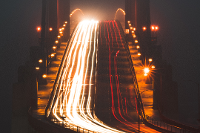

In [37]:
analyzed_bridges_item = admin_gis.content.search("Bridges_Analyzed", item_type="feature service")[2]
analyzed_bridges_item

# We need to distribute the results of our bridge commuting impact analysis with each county's GIS office. 

# With the ArcGIS API for Python, we can automate the creation of Users, Groups, and Items

# 1. Automate the creation of Users using the county staff webpage

http://www.fairfaxva.gov/government/staff-directory

In [38]:
staff_df = pd.read_html(fairfax_city_url)[0]
staff_df

,Staff,Title,Departments,Phone,Email
0,"Abashian, Lesley",Human Services Director,Human Services,(703) 385-7894,Email
1,"Agoncillo, Angeline",Accounts Payable,Finance,(703) 385-7873,Email
2,"Alexander, Christina",Project Manager / Environmental Engineer,Public Works,(703) 273-3067,Email
3,"Anderson, Tara",Permit Technician,"Code Administration, Fire Department",(703) 385-7830,Email
4,"Arnold, Chris",Concrete Supervisor,Public Works,(703) 385-7828,Email
5,"Baglini, Brianne",Operations Manager - Recreational Facilities,Parks & Recreation,(703) 385-1703,Email
6,"Bailey, Kevin",Clerk of the Court,General District Court,(703) 385-7866,Email
7,"Bartholme, Mike","Lieutenant, Patrol Division",Police,(703) 385-7958,Email
8,"Bell-Cregg, Sheila",Treasury Tech I,Treasurer,(703) 385-7900,Email
9,"Belyayev, Vadim",Systems Analyst/Application Developer III,Information Technology,(703) 385-7896,Email


## Let's create users for each person in the staff directory

In [39]:
roles_dictionary = {"Project Manager / Environmental Engineer":"org_user",
                    "Permit Technician": "org_user",
                    "Concrete Supervisor": "org_user",
                    "Sergeant, Traffic Services": "org_viewer",
                    "Operations Manager": "org_user",
                    "Asphalt Supervisor": "org_viewer",
                    "Transit Supervisor": "org_viewer",
                    "Director of Economic Development": "org_viewer"}

users_list = []
userobjects_list = []
dummy_password = "GoGators4Eva"

# Iterate on each record of the staff dataframe
for index, row in staff_df.iterrows():   
    
    

    
    # Read from the record
    if row["Title"] in roles_dictionary:
    
        firstname = row['Staff'].split(', ')[1]
        lastname = row['Staff'].split(', ')[0]
        username = "{0}{1}".format(firstname[0], lastname)  # Usernames composed of first initial and full last name
        email = row['Email']
        role = roles_dictionary[row["Title"]]  # Retrieve the right user role based on the person's title

        print("Creating user {0}...".format(username))
        users_list.append(username)

        user = users_gis.users.create(username=username,
                                      password=dummy_password,
                                      firstname=firstname,
                                      lastname=lastname,
                                      email=email,
                                      role=role)

        userobjects_list.append(user)
#         display(user)

Creating user CAlexander...
Creating user TAnderson...
Creating user CArnold...
Creating user CBlevins...
Creating user RBooth...
Creating user CBruno...


In [40]:
for usr_obj in userobjects_list:
    display(usr_obj)

<User username:CAlexander>

<User username:TAnderson>

<User username:CArnold>

<User username:CBlevins>

<User username:RBooth>

<User username:CBruno>

# 2. Automate the creation of Groups using the bridge data attributes

Iterate on the counties in the analyzed bridges layer, and create a group for each county

<Item title:"bridges_analyzed" type:Feature Layer Collection owner:ANieto_ndirt>
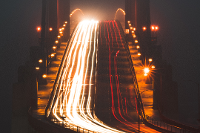

In [41]:
analyzed_bridges_item

In [42]:
analyzed_bridges_df = pd.DataFrame.spatial.from_layer(analyzed_bridges_item.layers[0])
analyzed_bridges_df

,DATE,DT,EXTRA,FEDERAL,FID,FUNDED,ITEM10,ITEM100,ITEM101,ITEM102,...,WO,WO_2,average_commute_miles_added,average_commute_minutes_added,cbsa_rank,commuters_impacted,county_rank,routes_impacted,total_additional_miles,total_additional_minutes
0,1202,,1,N,1,N,9999,0,N,3,...,,,3.841312e-03,3.435144e-04,48.5,235.0,1.0,14,0.9027083384081607,0.08072589460383028
1,0403,,1,N,2,N,9999,0,L,1,...,,,0.000000e+00,7.248810e-16,73.0,446.0,8.0,26,0.0,3.232969447708456e-13
2,1202,,1,N,3,N,9999,0,N,2,...,,,NaN,NaN,73.0,False,8.0,0,False,False
3,1202,,1,N,4,N,9999,0,N,2,...,,,NaN,NaN,73.0,False,8.0,0,False,False
4,1202,,1,N,5,N,9999,0,N,3,...,,,NaN,NaN,73.0,False,8.0,0,False,False
5,1202,,1,N,6,N,9999,0,N,2,...,,,NaN,NaN,73.0,False,8.0,0,False,False
6,1202,,1,N,7,N,9999,0,N,2,...,,,0.000000e+00,9.631545e-16,73.0,616,8.0,37,0.0,5.9330318436e-13
7,1202,,1,N,8,N,9999,0,N,2,...,,,NaN,NaN,73.0,False,8.0,0,False,False
8,1202,,1,N,9,N,9999,0,N,2,...,,,NaN,NaN,73.0,False,8.0,0,False,False
9,1202,,1,N,10,N,9999,0,N,2,...,,,1.578404e-02,1.118407e-02,45.0,189,1.0,11,2.9831837075,2.11378971956


##### TODO: Change to State Names

In [43]:
state_fips_list = analyzed_bridges_df['STFIPS'].unique().tolist()
state_fips_list

[51, 24, 11]

##### TODO: Change to County Names

In [44]:
# Build list of counties 
counties_fips_list = analyzed_bridges_df['ITEM3'].unique().tolist()
counties_fips_list

[69,
 157,
 187,
 43,
 47,
 61,
 107,
 177,
 153,
 59,
 179,
 630,
 21,
 31,
 1,
 13,
 17,
 33,
 9]

### County FIPS aren't very easy to work with... let's retrieve a crosswalk from the Census.
https://www2.census.gov/geo/docs/reference/codes/files/national_county.txt

In [45]:
county_df = pd.read_csv(r"https://www2.census.gov/geo/docs/reference/codes/files/national_county.txt", 
                        header=None,
                        names=["State", "State_FIPS", "County_FIPS", "County Name", "NA"]); county_df

,State,State_FIPS,County_FIPS,County Name,NA
0,AL,1,1,Autauga County,H1
1,AL,1,3,Baldwin County,H1
2,AL,1,5,Barbour County,H1
3,AL,1,7,Bibb County,H1
4,AL,1,9,Blount County,H1
5,AL,1,11,Bullock County,H1
6,AL,1,13,Butler County,H1
7,AL,1,15,Calhoun County,H1
8,AL,1,17,Chambers County,H1
9,AL,1,19,Cherokee County,H1


In [46]:
def get_county_name(county_fips):
#     row = county_df[county_df["County_FIPS"]==]
    pass
    # In Progress

In [47]:
# create groups
groups_list = []

for county_fips in counties_fips_list:

    print("Creating group for {0} county...".format(str(county_fips)))

    county_group = users_gis.groups.create("County {0}".format(str(county_fips)), "Bridge Impact Analysis; Transportation")
    display(county_group)
    if county_fips == "059":
        fairfax_group = county_group
    groups_list.append(county_group)

Creating group for 69 county...


<Group title:"County 69" owner:anieto>

Creating group for 157 county...


<Group title:"County 157" owner:anieto>

Creating group for 187 county...


<Group title:"County 187" owner:anieto>

Creating group for 43 county...


<Group title:"County 43" owner:anieto>

Creating group for 47 county...


<Group title:"County 47" owner:anieto>

Creating group for 61 county...


<Group title:"County 61" owner:anieto>

Creating group for 107 county...


<Group title:"County 107" owner:anieto>

Creating group for 177 county...


<Group title:"County 177" owner:anieto>

Creating group for 153 county...


<Group title:"County 153" owner:anieto>

Creating group for 59 county...


<Group title:"County 59" owner:anieto>

Creating group for 179 county...


<Group title:"County 179" owner:anieto>

Creating group for 630 county...


<Group title:"County 630" owner:anieto>

Creating group for 21 county...


<Group title:"County 21" owner:anieto>

Creating group for 31 county...


<Group title:"County 31" owner:anieto>

Creating group for 1 county...


<Group title:"County 1" owner:anieto>

Creating group for 13 county...


<Group title:"County 13" owner:anieto>

Creating group for 17 county...


<Group title:"County 17" owner:anieto>

Creating group for 33 county...


<Group title:"County 33" owner:anieto>

Creating group for 9 county...


<Group title:"County 9" owner:anieto>

In [52]:
fairfax_group

<Group title:"County 059" owner:anieto>

In [51]:
fairfax_group.add_users(users_list)

Group does not exist or is inaccessible.


RuntimeError: Group does not exist or is inaccessible.
(Error Code: 400)

In [ ]:
fairfax_group.get_members()

# 3. Automate the creation and publishing of Items for each group 

### Let's revisit our analyzed bridges layer...

In [ ]:
analyzed_bridges_map = admin_gis.map('Fairfax County', zoomlevel=8)
analyzed_bridges_map.basemap = 'gray-vector'
display(analyzed_bridges_map)
analyzed_bridges_map.add_layer(analyzed_bridges_item)

In [ ]:
analyzed_bridges_df

### For each county, we're going to create a feature layer containing the bridges for that county and with their own impact rankings, and share with the respective group

Iterate on specific counties

In [ ]:
counties_to_create = [59, 31, 153]
county_lyr_items = []
county_csv_items = []

for ix, county_fips in enumerate(counties_to_create):
    print("Creating analyzed bridges layer for county {0}...".format(str(county_fips)))
          
    county_df = analyzed_bridges_df[analyzed_bridges_df['ITEM3'] == county_fips]
    county_df.to_csv("Bridges_ImpactAnalysis_County{0}.csv".format(str(county_fips)))
    county_csv = "Bridges_ImpactAnalysis_County{0}.csv".format(str(county_fips))
    county_analyzed_csv_item = users_gis.content.add({}, county_csv)
    county_csv_items.append(county_analyzed_csv_item)
    
    county_analyzed_lyr = county_analyzed_csv_item.publish()
    county_lyr_items.append(county_analyzed_lyr)
    
    print("Layer published:")
    display(county_analyzed_lyr)

# Let's take a look at how the organization ended up!

https://datasciencedemo.esri.com/portal

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

<!-- <img src="" /> -->

#### Clean Up

In [53]:
fairfax_group.remove_users(users_list)

Group does not exist or is inaccessible.


RuntimeError: Group does not exist or is inaccessible.
(Error Code: 400)

In [ ]:
fairfax_group.get_members()

In [ ]:
# Clean up users
for user_obj in userobjects_list:
    print("Removing user {0}...".format(user_obj.username))
    user_obj.delete()

In [ ]:
# Clean up users
for group_obj in groups_list:
    print("Removing group {0}...".format(group_obj.title))
    group_obj.delete()

In [ ]:
# Clean up items
for county_csv in county_csv_items:
    print("Removing item {0}...".format(county_csv.title))
    county_csv.delete()

In [ ]:
# Clean up items
for county_lyr in county_lyr_items:
    print("Removing item {0}...".format(county_lyr.title))
    county_lyr.delete()